In [50]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
train = pd.read_csv("../data/traindata.csv")

In [4]:
test= pd.read_csv("../data/testdata.csv")

In [5]:
oot = pd.read_csv("../data/ootdata.csv")

In [103]:
logit = LogisticRegression()

In [33]:
y_label=train.loc[:,'Fraud']
x_label=train.iloc[:,1:21]

In [61]:
n_0 = train.shape[0]-sum(train.loc[:,'Fraud'])
n_1 = sum(train.loc[:,'Fraud'] )

In [62]:
weight_0 = train.shape[0]/(2*n_0)
weight_1 = train.shape[0]/(2*n_1)

In [74]:
weights = {0:weight_0,1:weight_1}

In [104]:
logit.fit(x_label, y_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
x_test = test.iloc[:,1:21]
x_oot = oot.iloc[:,1:21]

In [105]:
predictions = logit.predict_proba(x_test)

In [106]:
confusion_matrix(test.loc[:,'Fraud'], predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [107]:
pred_col=predictions[:,1]

In [111]:
pred_col

array([  1.97921363e-02,   2.20615160e-02,   2.19881379e-02, ...,
         2.95590953e-21,   7.80980855e-04,   2.41953904e-03])

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
test['pred_col']=pred_col


In [109]:
f_0=test.loc[test['Fraud']==0,'pred_col']
f_1=test.loc[test['Fraud']==1,'pred_col']

C:\Users\sidj1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


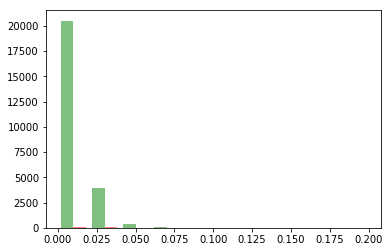

In [112]:
plt.hist([f_0,f_1],color=['g','r'],alpha=0.5, range= [0,0.2])
plt.show()

In [118]:
train39 = pd.read_csv("../data/traindata39.csv")
test39= pd.read_csv("../data/testdata39.csv")
oot39 = pd.read_csv("../data/ootdata39.csv")

In [154]:
logit_moreFeatures = LogisticRegression(class_weights=weights)

TypeError: __init__() got an unexpected keyword argument 'class_weights'

In [136]:
y_label=train39.loc[:,'Fraud']
x_label=train39.iloc[:,1:40]

In [140]:
logit_moreFeatures.fit(x_label,y_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
x_test = test39.iloc[:,1:40]

In [148]:
x = logit_moreFeatures.predict_proba(x_test)

C:\Users\sidj1\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [157]:
temp =x[:,1]
test39['temp']=temp

In [163]:
f_0=test39.loc[test39['Fraud']==0,'temp']
f_1=test39.loc[test39['Fraud']==1,'temp']

C:\Users\sidj1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


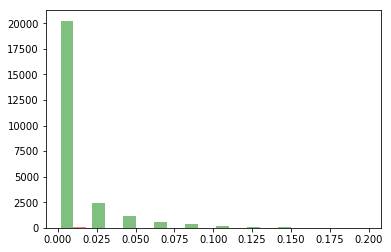

In [164]:
plt.hist([f_0,f_1],color=['g','r'],alpha=0.5, range= [0,0.2])
plt.show()

In [161]:
oot39_test = oot39.iloc[:,1:40]
y = logit_moreFeatures.predict_proba(oot39_test)

C:\Users\sidj1\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [162]:
temp =y[:,1]
oot39['temp']=temp

In [165]:
f_0=oot39.loc[oot39['Fraud']==0,'temp']
f_1=oot39.loc[oot39['Fraud']==1,'temp']

C:\Users\sidj1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


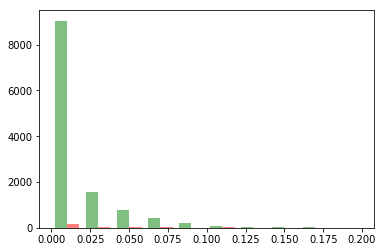

In [166]:
plt.hist([f_0,f_1],color=['g','r'],alpha=0.5, range= [0,0.2])
plt.show()